In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
common_companies = pd.read_csv("../ImportantCSVs/common_companies.csv", encoding = "utf8")

In [3]:
common_companies.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,...,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,Layoff Date,Company Name,Employees Affected
0,0,808a3ae7-b1ec-31f0-9335-8f49e4e10a40,1988,0,Web Development,0.919146,Software Engineering,0.068156,Los Angeles,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.538810e+12,2/1/2017,Symantec Corporation,87
1,0,1fe596b8-87d0-3118-ab5e-375485b477e9,1984,0,Mobile Telecommunications,0.571192,Business Development,0.260968,Mountain View,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.529320e+12,7/22/2015,"Cisco Systems, Inc.",192
2,0,43d4f687-4de8-39e0-91f4-ed90ba1e2862,1967,2,Education,0.264015,Recruiting,0.205493,San Francisco,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.538820e+12,10/10/2014,"Cisco Systems, Inc.",1005
3,0,6870e27a-1eb0-3be6-8878-43b3adc611cc,1964,0,Web Design,0.428620,Digital Marketing,0.313889,San Jose,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.538900e+12,6/10/2016,Symantec Corporation,15
4,0,8da0eaa5-8d1a-3360-986d-4ab1f5658930,1992,2,Software Engineering,0.704756,Web Development,0.284496,New York,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.538840e+12,7/22/2015,"Cisco Systems, Inc.",192


In [4]:
common_companies.shape

(8040, 37)

Text(0.5, 1.0, '# of candidates laid off in a particular month from 2014-01 to 2018-08')

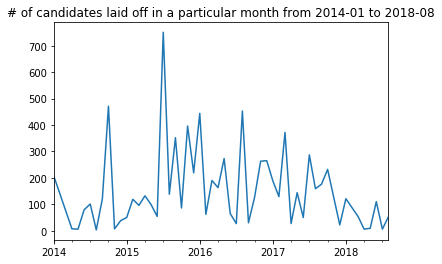

In [5]:
# Time Series analysis, y-value is the # of candidates being laid off in a particular month from 2014-01 to 2018-08
ts = common_companies['Layoff Date']
ts = pd.to_datetime(ts).dt.to_period('M').sort_values()

pd.value_counts(ts).sort_index().plot.line()
plt.title('# of candidates laid off in a particular month from 2014-01 to 2018-08')

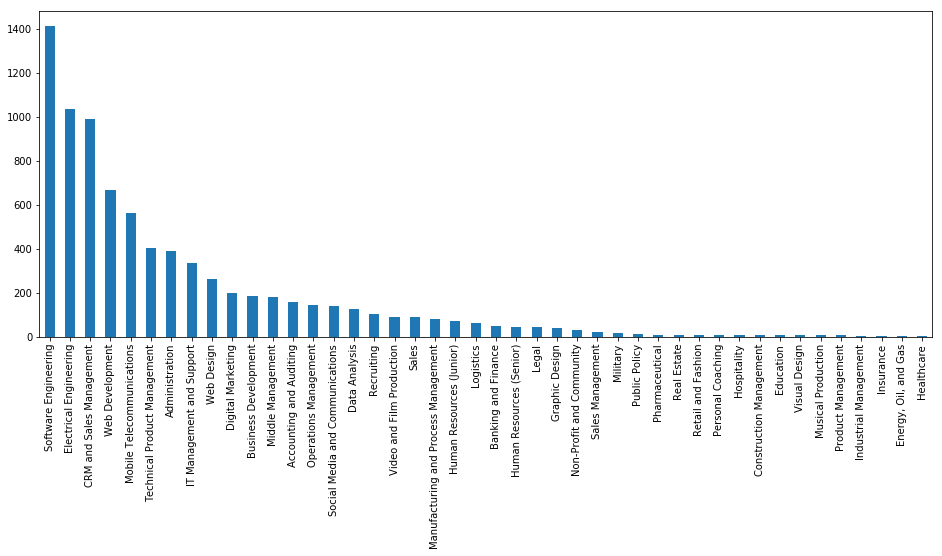

In [6]:
# Counts of skillsets out of 8040 observations
pd.value_counts(common_companies['Skillset1']).plot.bar(figsize = (16,6))

In [7]:
skills_count = pd.value_counts(common_companies['Skillset1']).to_frame()
skills_count.rename(columns={'Skillset1': 'count'}, inplace=True)
skills_count['Rank'] = range(1,len(skills_count)+1)
skills_count['Cumulative Probability'] = np.cumsum(skills_count['count'])/np.sum(skills_count['count'])
skills_count.head(30)

,count,Rank,Cumulative Probability
Software Engineering,1411,1,0.175498
Electrical Engineering,1033,2,0.303980
CRM and Sales Management,990,3,0.427114
Web Development,669,4,0.510323
Mobile Telecommunications,563,5,0.580348
Technical Product Management,405,6,0.630721
Administration,392,7,0.679478
IT Management and Support,334,8,0.721020
Web Design,264,9,0.753856
Digital Marketing,201,10,0.778856


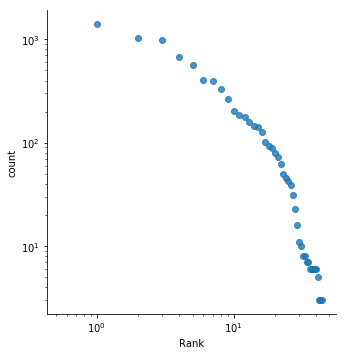

In [8]:
ax = sns.lmplot(x='Rank', y='count', data=skills_count, fit_reg=False)
ax.set(xscale="log", yscale="log")


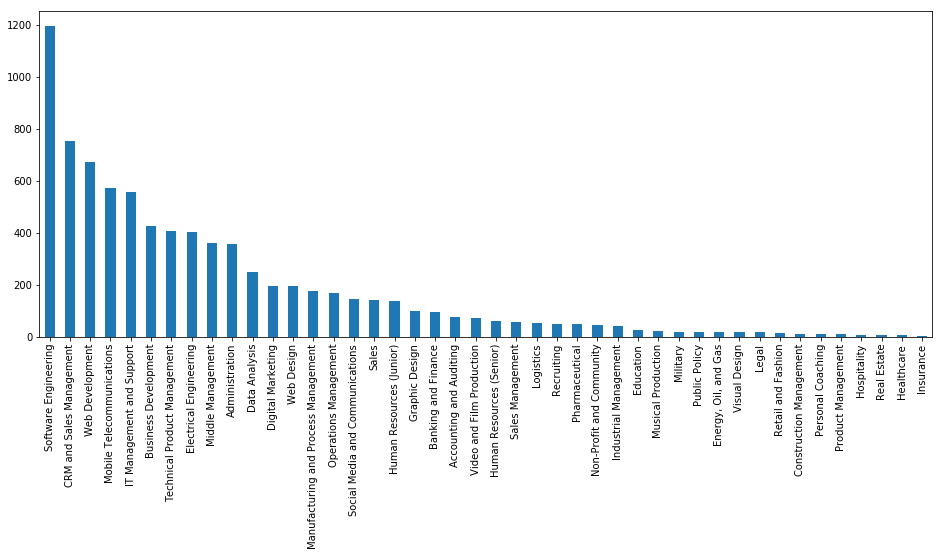

In [9]:
#Skill set 2
pd.value_counts(common_companies['Skillset2']).plot.bar(figsize = (16,6))

In [10]:
# Department Information
dept_count = pd.value_counts(common_companies['Dept']).to_frame()
dept_count.rename(columns={'Dept': 'count'}, inplace=True)
dept_count['Rank'] = range(1,len(dept_count)+1)
dept_count['Cumulative Probability'] = np.cumsum(dept_count['count'])/np.sum(dept_count['count'])
dept_count.head(30)

,count,Rank,Cumulative Probability
TECHNOLOGY,2107,1,0.385122
MARKETING,685,2,0.510327
BUSINESS,277,3,0.560958
PRODUCTION,218,4,0.600804
OPERATIONS,202,5,0.637726
OVERSIGHT,166,6,0.668068
ACCOUNTING,161,7,0.697496
HR,140,8,0.723085
"MARKETING,TECHNOLOGY",137,9,0.748126
"TECHNOLOGY,OVERSIGHT",79,10,0.762566


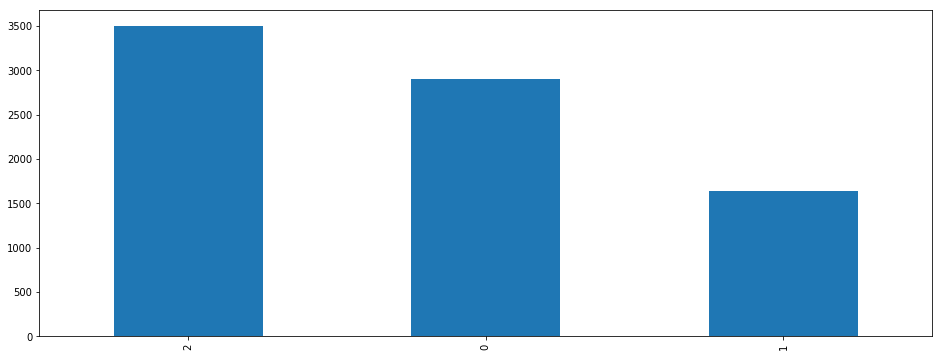

In [11]:
# Gender Distribution (1: female; 2: male; 0: unknown)
pd.value_counts(common_companies['Gender Flag']).plot.bar(figsize = (16,6))

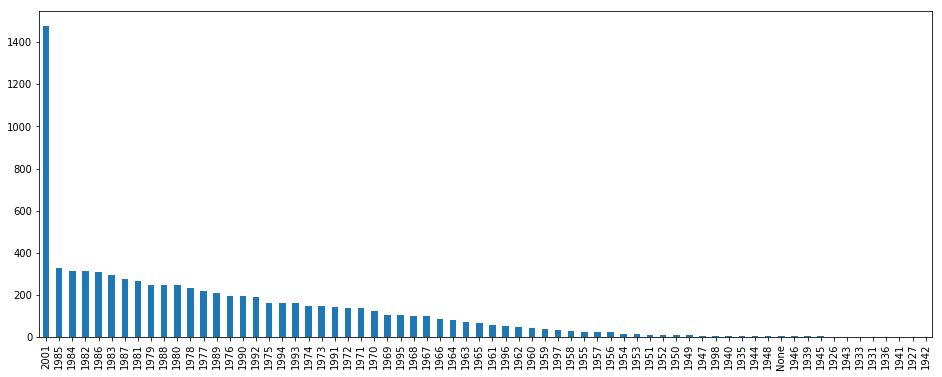

In [12]:
# Birth Year Distribution
pd.value_counts(common_companies['Birth Year']).plot.bar(figsize = (16,6))

Text(0.5, 1.0, 'Current Employment status')

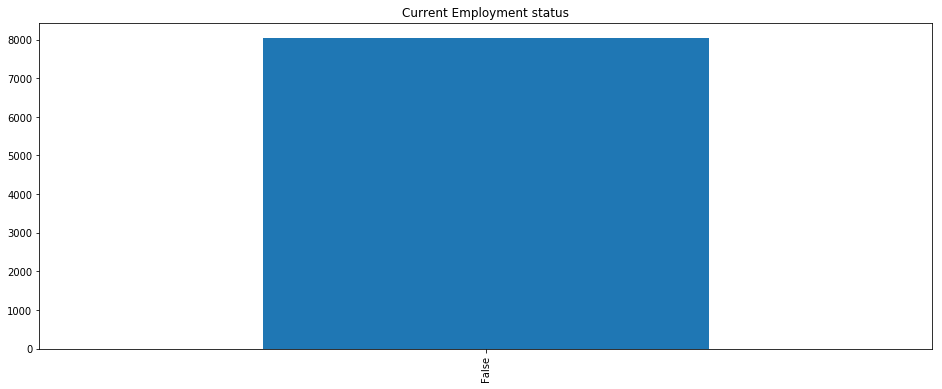

In [13]:
# Whether currently employed or not
pd.value_counts(common_companies['CurrentEmployFlag']).plot.bar(figsize = (16,6))
plt.title('Current Employment status')

Text(0.5, 1.0, 'Elite Instituion Flag')

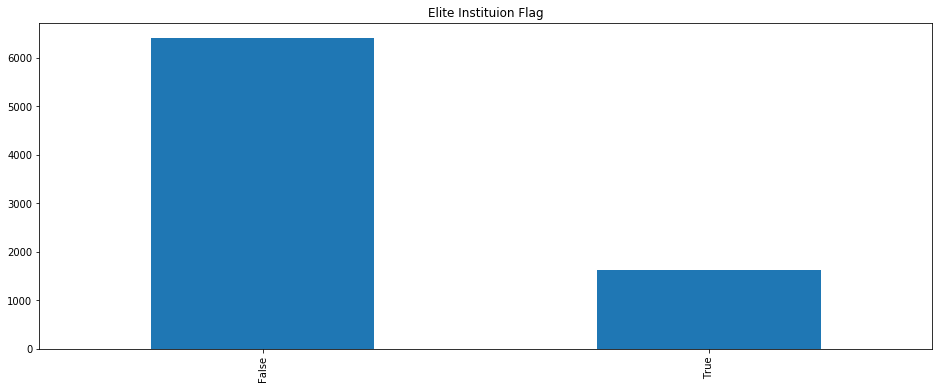

In [14]:
# Whether from an elite institution or not
pd.value_counts(common_companies['Elite Institution']).plot.bar(figsize = (16,6))
plt.title('Elite Instituion Flag')

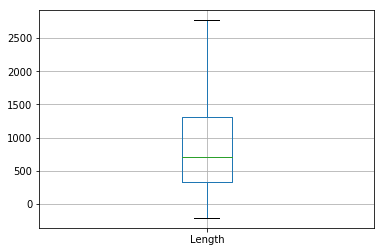

In [15]:
# Boxplot of each stay in units of days
common_companies.boxplot(column = 'Length', showfliers=False)

## EDA after skillsets are encoded





In [16]:
skills_encoded = pd.read_csv("../../Project/Data/common_companies(1).csv", encoding = "latin-1")

In [17]:
skills_encoded.shape

(8040, 37)

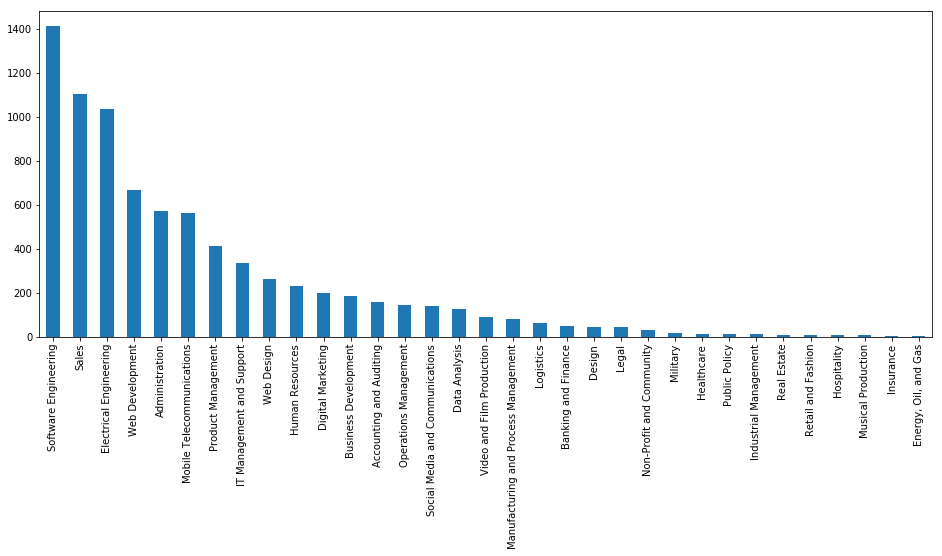

In [18]:

pd.value_counts(skills_encoded['Skillset1']).plot.bar(figsize = (16,6))

In [19]:
encoded_skills_count = pd.value_counts(skills_encoded['Skillset1']).to_frame()
encoded_skills_count.rename(columns={'Skillset1': 'count'}, inplace=True)
encoded_skills_count['Rank'] = range(1,len(encoded_skills_count)+1)
encoded_skills_count['Cumulative Probability'] = np.cumsum(encoded_skills_count['count'])/np.sum(encoded_skills_count['count'])
encoded_skills_count.head(30)

,count,Rank,Cumulative Probability
Software Engineering,1411,1,0.175498
Sales,1102,2,0.312562
Electrical Engineering,1033,3,0.441045
Web Development,669,4,0.524254
Administration,571,5,0.595274
Mobile Telecommunications,563,6,0.665299
Product Management,411,7,0.716418
IT Management and Support,334,8,0.757960
Web Design,264,9,0.790796
Human Resources,233,10,0.819776


In [20]:
skills_count.head(30)

,count,Rank,Cumulative Probability
Software Engineering,1411,1,0.175498
Electrical Engineering,1033,2,0.303980
CRM and Sales Management,990,3,0.427114
Web Development,669,4,0.510323
Mobile Telecommunications,563,5,0.580348
Technical Product Management,405,6,0.630721
Administration,392,7,0.679478
IT Management and Support,334,8,0.721020
Web Design,264,9,0.753856
Digital Marketing,201,10,0.778856


Text(0.5, 1.0, 'NUmber of candidates laid off according to different skillsets from 2014/01 to Aug 2018/08')

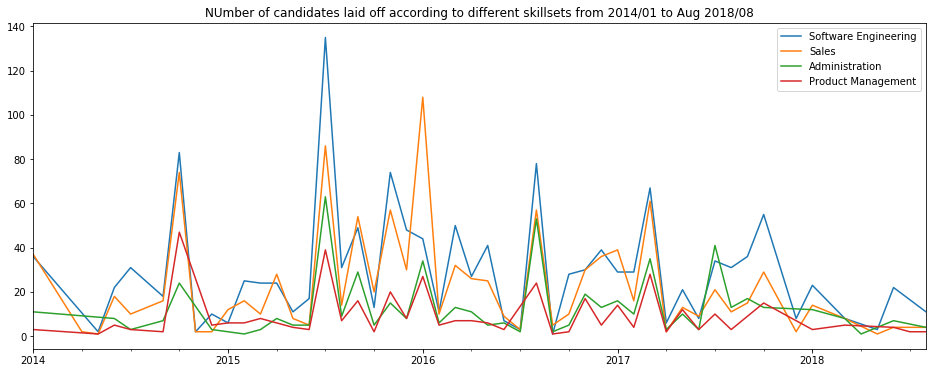

In [21]:
SE = skills_encoded[skills_encoded['Skillset1'] == 'Software Engineering']
ts_SE = SE['Layoff Date']
ts_SE = pd.to_datetime(ts_SE).dt.to_period('M').sort_values()
pd.value_counts(ts_SE).sort_index().plot.line(figsize = (16,6))

sales = skills_encoded[skills_encoded['Skillset1'] == 'Sales']
ts_sales = sales['Layoff Date']
ts_sales = pd.to_datetime(ts_sales).dt.to_period('M').sort_values()
pd.value_counts(ts_sales).sort_index().plot.line(figsize = (16,6))


admin = skills_encoded[skills_encoded['Skillset1'] == 'Administration']
ts_admin = admin['Layoff Date']
ts_admin = pd.to_datetime(ts_admin).dt.to_period('M').sort_values()
pd.value_counts(ts_admin).sort_index().plot.line(figsize = (16,6))

PM = skills_encoded[skills_encoded['Skillset1'] == 'Product Management']
ts_PM = PM['Layoff Date']
ts_PM = pd.to_datetime(ts_PM).dt.to_period('M').sort_values()
ts_PM
pd.value_counts(ts_PM).sort_index().plot.line(figsize = (16,6))


plt.legend(['Software Engineering', 'Sales', 'Administration', 'Product Management'], loc='upper right')
plt.title('NUmber of candidates laid off according to different skillsets from 2014/01 to Aug 2018/08')

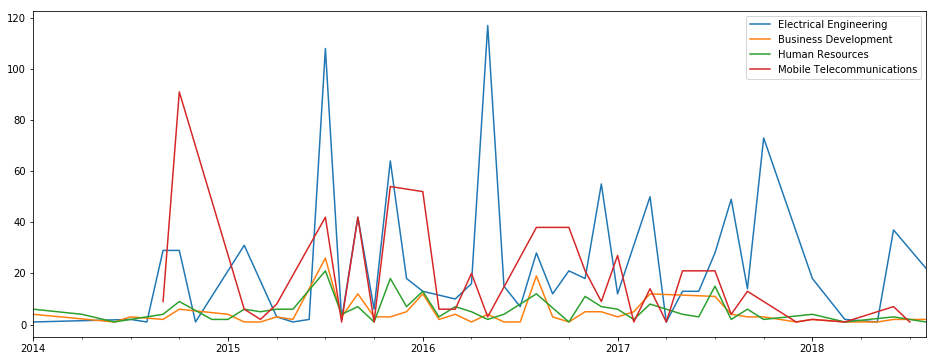

In [22]:
# Electrical Engineering, Business Development, Human Resources, Mobile Telecommunications
EE = skills_encoded[skills_encoded['Skillset1'] == 'Electrical Engineering']
ts_EE = EE['Layoff Date']
ts_EE = pd.to_datetime(ts_EE).dt.to_period('M').sort_values()
pd.value_counts(ts_EE).sort_index().plot.line(figsize = (16,6))

BD = skills_encoded[skills_encoded['Skillset1'] == 'Business Development']
ts_BD = BD['Layoff Date']
ts_BD = pd.to_datetime(ts_BD).dt.to_period('M').sort_values()
ts_BD
pd.value_counts(ts_BD).sort_index().plot.line(figsize = (16,6))

HR = skills_encoded[skills_encoded['Skillset1'] == 'Human Resources']
ts_HR = HR['Layoff Date']
ts_HR = pd.to_datetime(ts_HR).dt.to_period('M').sort_values()
pd.value_counts(ts_HR).sort_index().plot.line(figsize = (16,6))

MT = skills_encoded[skills_encoded['Skillset1'] == 'Mobile Telecommunications']
ts_MT = MT['Layoff Date']
ts_MT = pd.to_datetime(ts_MT).dt.to_period('M').sort_values()
pd.value_counts(ts_MT).sort_index().plot.line(figsize = (16,6))


plt.legend(['Electrical Engineering', 'Business Development', 'Human Resources', 'Mobile Telecommunications'], loc='upper right')

Text(0.5, 1.0, 'Distribution of length of employments')

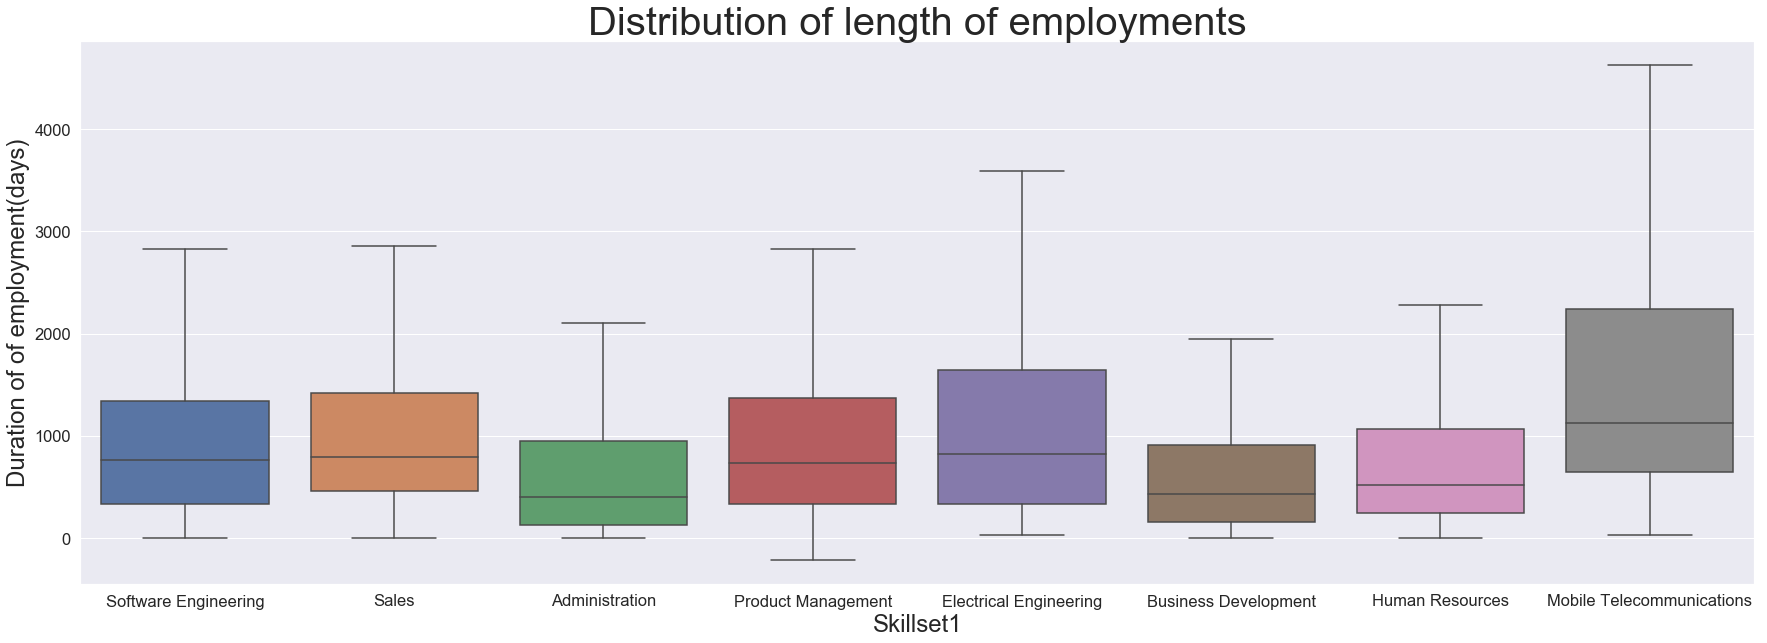

In [24]:
df = pd.concat([SE, sales, admin, PM, EE, BD, HR, MT])


ax = sns.boxplot(x = 'Skillset1', y = "Length", data = df,  showfliers=False)
sns.set(rc={'figure.figsize':(30,10)})

ax.set_xlabel("Skillset1", fontsize = 24)
ax.set_ylabel("Duration of of employment(days)",fontsize = 24)
ax.axes.set_title("Distribution of length of employments",fontsize=40)